# 찬혁

# 추천 시스템의 유형

1. **인구 통계학적 필터링 (Demographic Filtering)**
    
    : 영화의 인기도 또는 장르에 따라 모든 사용자에게 일반화된 추천 제공 
    
    기본적으로 더 인기 있고 비평가들이 호평을 한 영화를 일반적인 관객들이 더 선호 할 것이라는 가정을 기반으로 추천함.
    
2. **콘텐츠 기반 필터링 (Content Based Filtering)**
    
    : 특정 항목을 기준으로 유사한 항목 추천
    
    기본적으로 어떤 사람이 특정항목을 좋아한다면 그 사람은 그와 비슷한 항목도 좋아할 것이라는 가정을 기반으로 추천함.
    
3. **협력 필터링 (Collaborative Filtering)**
    
    : 관심사가 비슷한 사람을 매칭하여 이 매칭을 기반으로 추천을 제공.

In [88]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../[kaggle코드리뷰] 영화 추천 시스템/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../[kaggle코드리뷰] 영화 추천 시스템/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

사용할 데이터 셋의 features

df1
* movie_id : 영화의 고유 id
* cast : 영화배우
* crew : 감독, 작가등의 이름

df2 
* budget : 예산
* genre : 영화장르
* homepage : 영화 홈페이지 링크
* id : 첫번째 데이터 셋에서 movie_id와 동일
* keyword : 영화와 관련된 키워드, 태그
* original_language : 영화의 주된 언어
* original_title : 번역전 영화의 원래 제목
* overview : 영화에 대한 간략한 설명
* popularity : 영화의 인기를 정량적으로 표시
* production_companies : 영화 제작소
* production_countries : 영화 제작 국가
* release_date : 개봉일
* revenue : 전세계 수익
* runtime : running time
* status :  "released" or "Rumored"
* tagline : 영화의 tagline
* title : 영화 제목
* vote_average : 평균 평점
* vote_count : 평점 수

두 데이터 셋을 id를 기준으로 join

In [89]:
df1.columns = ["id", "title", "cast", "crew"]
df2 = df2.merge(df1, on = "id")

df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 1. 인구 통계학적 필터링 Demographic Filtering

시작하기 전에 
* 영화의 점수나 등급을 매길 수 있는 척도 필요
* 모든 영화의 score 계산하기
* 점수별로 정렬하고 사용자에게 최고 등급의 영화를 추천함.

영화의 평균 평점을 점수로 사용할 수 있음. 

but 평균 평점이 8.9인데 평점수가 3개인 영화보다 평균평점이 7.9인데 평점수가 40개인 영화가 더 나으므로 , IMDB의 가중평점 (weighted rating) 사용

weighted Rating (WR) = $$(\frac{v}{v+m} \cdot R ) + (\frac{m}{v+m} \cdot C)$$

* v : 영화의 평점 수
* m : chart에 등록되는데 필요한 최소 평점수 
* R : 영화의 평균 평점
* C : 전체 report의 평균 평점 수 

v(vote_count) 와 R (vote_average)는 주어져 있고, C는 다음과 같이 계산할 수 있음


In [90]:
C = df2['vote_average'].mean()
C

6.092171559442016

즉, 평균 평점은 10점만점에 6점에 근사함.

다음으로 차트에 이름을 올리기 위해 최소 득표수인 m에 대한 적절한 값을 정해보자

-> 영화가 차트에 나오려면 vote count 의 상위 90%의 득표수를 가지고 있어야하는 것으로 결정

In [91]:
m = df2['vote_count'].quantile(0.9)
m
# 즉, 한 영화의 득표수가 1838개 이상이어야지 차트에 올라감

q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 23)

481개의 데이터가 걸러졌음. 

이를 기반으로 이제 각 영화별로 위에서 이야기한 metric 계산함. 이를 위해 weighted_rating()함수를 정의하고, 새로운 feature score를 정의하여 값 계산

In [92]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # IMDB formula 에 기반해서 계산
    return (v/(v+m) * R) + (m/(m+v) * C)

In [93]:
# score 열을 만들어서 계산 결과 대입
q_movies['score'] = q_movies.apply(weighted_rating, axis = 1)

마지막으로 score열을 기준으로 데이터 정렬 후 상위 10개의 영화의  제목, vote count, vote average, weighted rating or score 출력

In [94]:
# sort
q_movies = q_movies.sort_values('score', ascending= False)

q_movies[['title_x','vote_count','vote_average','score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Demographic filtering 은 모든 사용자에게 일반적으로 추천할만한 결과를 도출해냄. 즉, 특정 사용자의 관심사와 취향에 민감하지 않음.

Text(0.5, 1.0, 'Popular Movies')

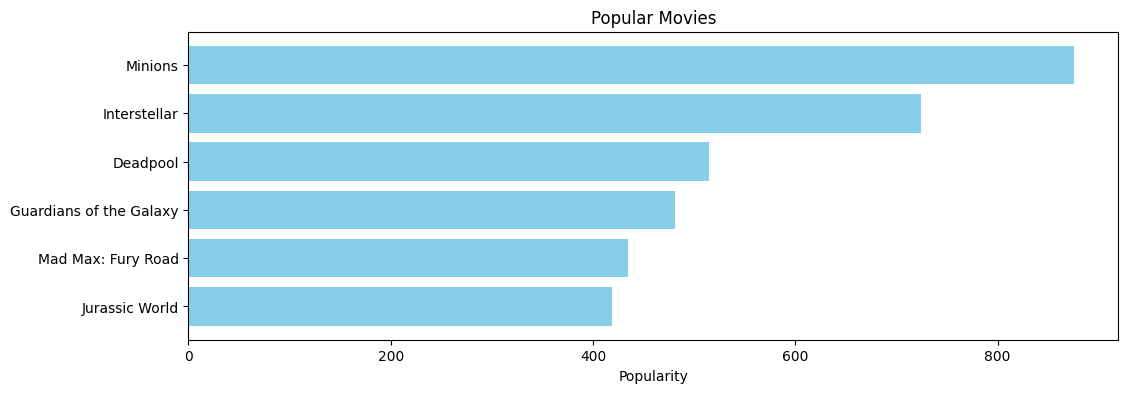

In [95]:
# popularity를 기준으로 정렬하여 시각화 

pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


# 2. 콘텐츠 기반 필터링 (Content based filtering)

이 추천 시스템에서는 영화의 내용을 이용하여 다른 영화와의 유사성을 찾고, 그 다음에 유사성이 가장 높은 영화를 추천함.



## 2-1. plot description 기반 추천

plot description = 영화의 overview

즉 영화내용의 개요를 기반으로 추천을 진행함.

이를 위해 자연어 처리가 필요함. 
이때 단어를 벡터화 시키는 과정이 필요한데, 여기서는 TF-IDF 방식이용


> TF-IDF (Term Frequency - Inverse Document Frequency) 

: 단어의 빈도 * 1/(문서의 빈도)를 사용하여 각 단어들 마다의 중요한 정도를 가중치로 주는 방법, 즉 특정 문서 d에 특정 단어 t가 많이 등장하고, 특정 단어 t가 등장한 문서의 수가 작으면 특정 문서 d에서 단어 t의 중요도 (가중치) 는 높다. 

주로 문서의 유사도를 구하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 사용 가능 

sci-kit learn 에서 해당 기능 제공

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer 객체 선언. the, a 와 같은 stop worcs 제거
tfidf = TfidfVectorizer(stop_words = 'english')

# 결측치 처리. 결측치는 ""로 대체
df2['overview'] = df2['overview'].fillna('')

# overview를 tfidf matrix로 변환
tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

4803개의 영화의 overview는 20978개의 서로 다른 단어로 표현할 수 있음.

위 행렬을 가지고 유사도 점수 계산가능

[유사도 계산 방법]
* 유클리드 유사도
* 피어슨 유사도
* 코사인 유사도

유사도 계산 방법은 어떤것이 절대적으로 좋다는 건 x , 상황에 따라서 좋은 유사도 계산 방법이 다름.

여기서는 코사인 유사도를 이용해서 각 영화간 유사도를 계산할 것임.

$cos \ similarity = cos(\theta) = \frac{A \cdot B}{||A||||B||} = \frac{\Sigma A_i B_i}{\sqrt{\Sigma A_i^2}\sqrt{\Sigma B_i^2}}$

위에서 TF-IDF vectorizer를 사용하였기 때문에 dot product를 이용하면 cosine 유사도를 계산할 수 있음.

즉, 여기서 A, B는 모두 동일하게 tfdif_matrix임.


In [97]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화 제목을 input으로 받고 그 영화와 가장 유사한 영화 10개의 제목을 output으로 하는 함수 get_recommendations 정의

이를 위해 영화 제목과 Dataframe 인덱스의 reverse mapping이 필요함. 즉 영화 제목이 주어졌을 때, 메타 데이터 데이터 프레임에서 영화의 인덱스를 식별할 수 있어야 함.

In [98]:
# 영화 title에 인덱스를 0부터 달아주는 작업. 중복은 제거한다
indices = pd.Series(df2.index, index = df2['title_x']).drop_duplicates()
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

get_recommendations 함수 프로세스
1. 제목이 지정된 영화의 index 가져오기
2. 해당 영화와 다른 영화의 코사인 유사도 점수 list 가져오기. 그 후, (영화 idx , 유사도 점수)인 튜플로 변환

3. 유사도 점수를 기준으로 튜플 정렬
4. 상위 10개의 영화를 가져오기. 이때 가장 유사도가 높은 영화는 자기 자신이기 때문에 제외
5. 상위 element의 index에 해당하는 제목 반환


In [140]:
def get_recommendations(title, cosine_sim = cosine_sim):
    # title과 match되는 index
    idx = indices[title]

    # 해당 영화와 다른 영화들의 유사도 점수
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도를 기준으로 내림차순 정렬
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)

    # 상위 10개의 영화. 이때 가장 높은 유사도를 갖는 영화는 자기자신이므로 제외.
    simm_scores = sim_scores[1:11]
    print
    # 상위 영화들의 idx 뽑아내기
    movie_indices = [i[0] for i in sim_scores]

    # return top 10 movie title
    return df2['title_x'].iloc[movie_indices]

In [141]:
get_recommendations('Inception')

96                               Inception
2897                                Cypher
134     Mission: Impossible - Rogue Nation
1930                            Stone Cold
914                   Central Intelligence
                       ...                
4794          Sanctuary: Quite a Conundrum
4796                                Primer
4797                                Cavite
4798                           El Mariachi
4799                             Newlyweds
Name: title_x, Length: 4803, dtype: object

In [101]:
get_recommendations('The Dark Knight Rises')

3       The Dark Knight Rises
65            The Dark Knight
299            Batman Forever
428            Batman Returns
1359                   Batman
                ...          
4795                     Bang
4796                   Primer
4797                   Cavite
4798              El Mariachi
4799                Newlyweds
Name: title_x, Length: 4803, dtype: object

줄거리가 비슷한 영화를 추천해주지만 그닥 유의한 결과는 아님.
<다크나이트라이즈>와 비슷한 영화를 추천해주면 배트맨 관련 영화 return하고 그 영화를 좋아했던 사람들이 다른 크리스토퍼 놀란 영화를 좋아하는 경향이 있을 가능성이 높다.

but 이 알고리즘으로는 이를 반영할 수 없음.

## 2-2. credits, Genres, keyword 기반 추천

위에서는 줄거리만을 기반으로 추천을 진행하였음. 이는 비슷한 감독의 영화를 선호하는 것과 같은 경우를 반영하지 못함. 따라서 배우, 장르, 영화 키워드에 기반하여 추천 진행

cast, crew, keyword 열에서 감독이랑 배우, 영화와 관련된 키워드에 대해서 가장 중요한 것 각 3개씩 추출하여 사용.
또한, 우리 데이터는 "stringfied" 형태 (문자열형태) 이므로 딕셔너리/리스트 형태로 바꾸어주어야함.

In [102]:
# 문자열을 딕셔너리/리스트로 변환
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [103]:
# crew 열에서 director 이름 추출하기. 만약 director가 없으면 nan return 
def get_director(x):
    for i in x :
        if i ['job'] == 'Director':
            return i['name']
    return np.nan


# 중요한거 3개씩 뽑는 함수
def get_list(x):
    if isinstance(x, list): # x가 list형인지 확인
        names = [i['name'] for i in x]
        # 3개 이상이면 3개 뽑고 3개 이하면 return empty list
        if len(names) > 3 :
            names = names[:3]
        return names
    return []


In [104]:
# director, cast, genres, keyword 열 새로 정의

## director는 string 형태
df2['director'] = df2['crew'].apply(get_director)

## cast, keyword, genres는 3개씩 뽑았으므로 list 형태
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

벡터화 전, 키워드의 instance들을 소문자로 변환하고 공백을 제거

이를 통해 "Johnny Depp"과 "Johnny Galecki"의 Johnny를 같은 것으로 인식하지 않음.

In [105]:
# 소문자 변환과 공백제거 함수
def clean_data(x):
    # cast, keyword, genres열의 경우
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x] 
    else:
        # director열의 경우
        ## 감독이 존재하면 소문자 변환과 공백제거, 존재하지 않으면 "" 반환
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [106]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

선정한 키워드들을 공백을 기준으로 하나의 string으로 만든 열 soup추가

In [107]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)
df2['soup'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

선정한 키워드를 벡터화 시켜서 추천 시스템에 적용해야함. 

여기서는 TF-IDF vectorizer 말고 Count vectorizer사용. 영화에 직접적으로 영향을 준 영화감독이나 배우에 가중치를 낮추지 않기 위해서 count vectorizer사용

(Tf-idf방법 사용시 광범위 하게 단어가 나오면 가중치 값이 낮아지기 때문에 count vectorizer사용)

> CountVectorizer: 각 문서에서 단어의 빈도를 카운트하여 벡터를 생성. 단어의 중요도를 고려하지 않으며, 단어의 순서를 고려하지 않는다.

이후 cosine 유사도를 계산하고 reverse mapping을 진행한 후, 위에서 만든 get_recommendations 함수 적용

In [108]:
# count vectorizer사용해서 벡터화 진행
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])


# 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


# 위와 동일하게 reverse mapping 진행
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title_x'])

In [109]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

3              The Dark Knight Rises
65                   The Dark Knight
119                    Batman Begins
4638        Amidst the Devil's Wings
1196                    The Prestige
                    ...             
4794    Sanctuary: Quite a Conundrum
4797                          Cavite
4799                       Newlyweds
4801                Shanghai Calling
4802               My Date with Drew
Name: title_x, Length: 4803, dtype: object

In [110]:
get_recommendations('Inception', cosine_sim2)

96                      Inception
1568                       Looper
1431                 Premium Rush
4401          The Helix... Loaded
1715                      Timecop
                  ...            
4795                         Bang
4799                    Newlyweds
4800    Signed, Sealed, Delivered
4801             Shanghai Calling
4802            My Date with Drew
Name: title_x, Length: 4803, dtype: object

# 3. 협력 필터링 (collaborative Filtering)

콘텐츠 기반 필터링은 비슷한 영화만 추천할 수 있다는 한계를 가짐. 즉 고객의 취향을 파악하여 다른 장르의 영화를 추천하지는 못함.

또한, 위에서 만든 콘텐츠 기반 필터링 시스템은 개인적인 취향을 반영하지 못한다는 점에서 개인화 추천시스템이 아님. 즉, 고객은 계속 비슷한 종류의 영화만을 추천 받는다는 문제가 있음.

위 문제는 collaborative filtering을 사용하면 해결할 수 있음. 협력 필터링의 종류는 크게 2가지로 나눌 수 있음.
<br><br>


* **사용자기반 필터링 (User based filtering)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; : 유사한 user가 좋아한 제품을 user에게 추천하는 방법. 두 user의 유사성은 피어슨 상관계수 or 코사인 유사도로 측정가능.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **[문제점]**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;사용자 기반 필터링 계산은 간단하지만 시간이 지남에 따라 user의 선호도가 변화할 수 있다는 문제점을 가지고 있음. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> 아이템 기반 필터링 사용가능

<br>

* **아이템 기반 필터링 (Item based filtering)** 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: user간 유사도 대신, 상대 user가 평가한 item과의 유사도를 기준으로 item 추천. 마찬가지로 피어슨 상관계수 , 코사인 유사도로 유사도 계산가능.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;아이템과 user간의 유사도는 잘 바뀌지 않으므로 user의 선호도가 변함으로써 발생하는 문제를 방지할 수 있음.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[문제점]**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;계산 복잡도 문제가 있음. 아이템 기반 필터링 방법을 사용할 경우 계산 복잡도는 아이템 수와 user 수 모두에 의존하고 있기 때문에 아이템수나 user수가 증가하면 계산 복잡도가 크게 높아짐.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;또한 데이터 희소성 문제가 있음. 예를 들어서 두 영화의 연관성이 1이지만 두 영화 모두 평가를 남긴 사람이 1명일 때 추천을 진행할 수 없음


## Singular Value Decomposition

collaborative filtering의 최근접 이웃 방법에서 발생하는 문제를 해결하기 위해 Latant factor model을 활용하여 사용자와 항목간의 유사성을 알아낼 수 있음.

이를 위해 추천 문제를 최적화 문제로 전환해야함. 즉, 사용자에게 추천된 item이 얼마나 잘 예측되어 추천되었는지로 볼 수 있음. 이를 위한 지표로 RMSE 사용가능

여기서 Latent factor란 item과 user 사이의 잠재 요인임. 예를 들어서 노래와 user 사이의 잠재요인은 장르가 있을 수 있다. SVD 는 이 잠재요인을 추출하여 행렬의 차원을 축소시킬 수 있음. 즉, SVD를 이용하여 행렬의 잠재요인을 추출함으로써 행렬을 차원이 r인 잠재 공간으로 매핑하는것임. 이를 통해 user과 item 사이의 관게를 더 잘 이해할 수 있게 됨.


위에서 사용했던 데이터는 user id가 없으므로 새로운 데이터셋 사용

이 데이터 셋은 5점 만점의 평가로 이루어짐

In [111]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
ratings = pd.read_csv('../[kaggle코드리뷰] 영화 추천 시스템/input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [112]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# SVD 수행, cross validation 방법으로 fold수는 5개
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv = 5)

{'test_rmse': array([0.90502373, 0.89653715, 0.89042941, 0.89837029, 0.89779337]),
 'test_mae': array([0.69763573, 0.68683433, 0.68489255, 0.69189371, 0.69241505]),
 'fit_time': (0.7774310111999512,
  0.7613160610198975,
  0.7118971347808838,
  0.7213220596313477,
  0.8255209922790527),
 'test_time': (0.06477093696594238,
  0.30959224700927734,
  0.06630778312683105,
  0.06550884246826172,
  0.06616592407226562)}

RMSE가 약 0.89정도로 충분한 성능을 보여주고 있음.

모든 데이터 셋을 svd 모델에 학습 시켜 추천 예측 진행

In [113]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [114]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [115]:
# svd predict(user_id, item_id, r_ui, verbose = False)
## user_id : 예측하려는 사용자의 식별자
## item_id : 예측하려는 아이템의 식별자
## r_ui : (선택적) 사용자가 실제로 부여한 평점. 이 값을 지정하면 모델의 예측 결과에 대한 평가를 위해 사용된다. 보통 평가를 위해 사용하며, 특히 교차검증시 활용됨
## verbose : (선택적) True인경우 예측결과에 대한 상세한 정보 출력
svd.predict(1,302, r_ui = 3, verbose= True)

user: 1          item: 302        r_ui = 3.00   est = 2.71   {'was_impossible': False}


Prediction(uid=1, iid=302, r_ui=3, est=2.7145062115271825, details={'was_impossible': False})

예측결과 예측 평점은 약 2.66

위 방법은 영화의 내용은 관여하지 않고 단순히 다른 사용자가 그 영화를 어떻게 평가했는지에 기반하여 평점을 에측함.

# 선민

# **The Age of Recommender Systems**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

**So let's go!**

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

 유저에 대한 인구통계학(demographic)적인 정보를 이용합니다. 우선, 나이/성별/인종 등을 고려하여 인구통계학적 집단(demographic stereotype/cluster)을 정의해 둔 후, 타깃 유저를 이 중 한 집단으로 분류하는 것이죠. 비슷한 인구통계학적 특성을 보이는 사람들은 취향도 비슷할 것이라 가정하는 것입니다.

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

유저가 아닌 아이템의 내용(contents)에 집중합니다. 영화를 예로 들면, 영화의 장르, 러닝타임, 감독, 주연 배우 등 영화에 대한 기본 정보를 활용합니다. 뮤지컬 영화를 좋아하는 저와 같은 유저들에게 같은 장르인 ‘라라 랜드’를 추천해주는 것이죠. 
 

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

타깃 유저에 대한 데이터뿐만 아니라 다른 유저들에 대한 데이터도 적극적으로 활용합니다. 타깃 유저의 정보와 타 유저들의 정보가 협동(collaborate)하여 숨어있던 보석들을 찾아주는 식이죠.

Let's load the data now.

In [2]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [3]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

Let's join the two dataset on the 'id' column


In [5]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Just a peak at our data.

In [6]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

## 가중 평점(weighted Rating): 
1,2명의 소수의 관객이 특정 영화에 만점이나 매우 높은 평점을 부여해 왜곡된 데이터를 방지하기 위해
* v: 개별 영화에 평점을 투표한 횟수
* m: 평점을 부여하기 위한 최소 투표 횟수
* R: 개별 영화에 대한 평균 평점
* C: 전체 영화에 대한 평균 평점

In [7]:
C= df2['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [8]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart 

In [9]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [10]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [12]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
# 제목, 영화에 평점을 투표한 횟수, 평균 평점, 가중치가 더해진 평점
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Hurray! We have made our first(though very basic) recommender.
Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

### 인기있는 영화 순서대로 

Text(0.5,1,'Popular Movies')

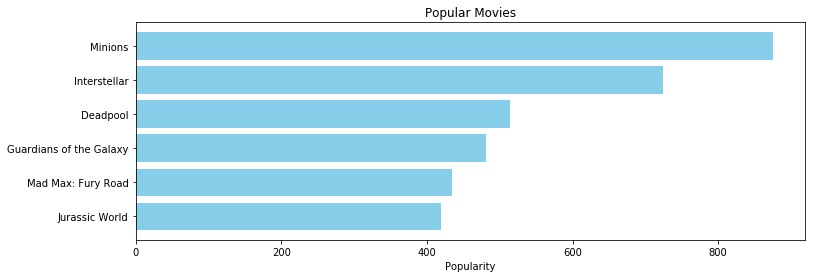

In [13]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

 overview 줄거리 데이터 가지고 추천해주기

In [14]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

### 사이킷런의 TfIdfVectorizer 패키지를 이용하여 TF-IDF matrix 만들기 

* Term Frequency-Inverse Document Frequency (TF-IDF) vectors: 특정 단어가 해당 문서에서 얼마나 unique 한가를 나타내기 위한 방식이다. TF-IDF가 높을수록 해당 단어가 다른 문서에서는 적게 사용된다는 것을 의미한다(=해당 문서에서 uniqueness가 높다) 

In [15]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
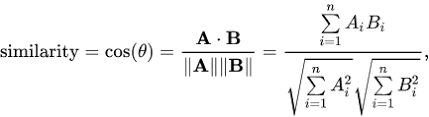

### 두 영화의 코사인 유사도를 계산하기

약 2만개가 넘는 단어가 4800개의 영화를 설명하는데 쓰임
- 사이킷런의 linear_kernel 사용하면 빠른 계산 가능


Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [16]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [17]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

input: 영화 제목 / output: 최대한 비슷한 10개의 추천 영화

In [18]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


In [19]:
indices

title
Avatar                                            0
Pirates of the Caribbean: At World's End          1
Spectre                                           2
The Dark Knight Rises                             3
John Carter                                       4
Spider-Man 3                                      5
Tangled                                           6
Avengers: Age of Ultron                           7
Harry Potter and the Half-Blood Prince            8
Batman v Superman: Dawn of Justice                9
Superman Returns                                 10
Quantum of Solace                                11
Pirates of the Caribbean: Dead Man's Chest       12
The Lone Ranger                                  13
Man of Steel                                     14
The Chronicles of Narnia: Prince Caspian         15
The Avengers                                     16
Pirates of the Caribbean: On Stranger Tides      17
Men in Black 3                                   18
The Ho

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

* 제목이 지정된 영화의 인덱스 가져오기
* 모든 영화와 함께 해당 영화의 코사인 유사도 점수 목록을 가져옵니다. 
    첫 번째 요소: 해당 위치 / 두 번째 요소: 유사도 점수인 튜플 목록으로 변환합니다.
* 유사도 점수, 즉 두 번째 요소를 기준으로 앞서 설명한 튜플 목록을 정렬합니다.
* 이 목록의 상위 10개 요소를 가져옵니다. 첫 번째 요소는 자신을 가리키는 것이므로 무시합니다(특정 영화와 가장 유사한 영화는 영화 자체입니다).
* 상위 요소의 인덱스에 해당하는 제목을 반환

In [50]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    # 해당 영화의 index 값 얻기
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    #코사인 유사도 점수list 가져오기 
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    # 유사도를 기반으로 정렬하기
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    # 제일 비슷한 10개의 항목 가져오기 (첫번째는 자기자신이니까 빼고)
    print(sim_scores[0])
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [51]:
get_recommendations('The Dark Knight Rises')

(3, 0.9999999999999994)


65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [52]:
get_recommendations('Inception')

(96, 1.0000000000000002)


2897                                Cypher
134     Mission: Impossible - Rogue Nation
1930                            Stone Cold
914                   Central Intelligence
1683                       Pitch Perfect 2
1248                        At First Sight
1512                 A History of Violence
2389                           Renaissance
1803                        Blood and Wine
1267                                Duplex
Name: title, dtype: object

In [53]:
get_recommendations('The Avengers')

(16, 1.0000000000000002)


7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

## **Credits, Genres and Keywords Based Recommender**
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [23]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


top 3 배우, 감독등 장르와 관련되고 줄거리 단어로부터 추천 제안

In [24]:
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')


이럴때 손쉽게 쓸 수 있는게 literal_eval이다.
literal_eval은 문자열을 딕셔너리/리스트 형태로 바꿔줄 수 있다. 사용방법은 다음과 같다.

a = "['호랑이', '사자', '기린']"
a = liter_eval(a)
a = ['호랑이', '사자', '기린']

간단하게 literal_eval을 씌울 경우 이렇게 리스트 형태로 형 변화가 된다. literal_eval은 2차원 리스트 이상 고차원리스트에도 쓸 수 있다.

In [25]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [26]:
df2[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [27]:
df2.loc[0,'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

Next, we'll write functions that will help us to extract the required information from each feature.

### 감독 이름 뽑아내기

In [28]:
# Get the director's name from the crew feature. If director is not listed, return NaN

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [29]:
# Returns the list top 3 elements or entire list; whichever is more.
# top3 목록 또는 전체 뽑아내기

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        #이름이 3개 이상이면 뽑고 아니면 전체 list 
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [30]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)
df2['director'][0:5]

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [31]:
# cast 와 keyword, genres에 대해서는 3개씩 뽑아서 넣기
features = ['cast', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [32]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

이름, keyword 대체어들이 나눠지지 않음 -> 
Johnny는 Johnny Depp 이 될수도 있고 Johnny Galecki가 될수도 있는데, 그들을 구분해서 세지 않았음

In [33]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [34]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [35]:
df2[features]

,cast,keywords,director,genres
0,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]",jamescameron,"[action, adventure, fantasy]"
1,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]",goreverbinski,"[adventure, fantasy, action]"
2,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]",sammendes,"[action, adventure, crime]"
3,"[christianbale, michaelcaine, garyoldman]","[dccomics, crimefighter, terrorist]",christophernolan,"[action, crime, drama]"
4,"[taylorkitsch, lynncollins, samanthamorton]","[basedonnovel, mars, medallion]",andrewstanton,"[action, adventure, sciencefiction]"
5,"[tobeymaguire, kirstendunst, jamesfranco]","[dualidentity, amnesia, sandstorm]",samraimi,"[fantasy, action, adventure]"
6,"[zacharylevi, mandymoore, donnamurphy]","[hostage, magic, horse]",byronhoward,"[animation, family]"
7,"[robertdowneyjr., chrishemsworth, markruffalo]","[marvelcomic, sequel, superhero]",josswhedon,"[action, adventure, sciencefiction]"
8,"[danielradcliffe, rupertgrint, emmawatson]","[witch, magic, broom]",davidyates,"[adventure, fantasy, family]"
9,"[benaffleck, henrycavill, galgadot]","[dccomics, vigilante, superhero]",zacksnyder,"[action, adventure, fantasy]"


We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

metadat를 포함하고 있는 모든 벡터를 합지기

In [36]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [37]:
#meta data가 다 섞여있음 
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
5       dualidentity amnesia sandstorm tobeymaguire ki...
6       hostage magic horse zacharylevi mandymoore don...
7       marvelcomic sequel superhero robertdowneyjr. c...
8       witch magic broom danielradcliffe rupertgrint ...
9       dccomics vigilante superhero benaffleck henryc...
10      savingtheworld dccomics invulnerability brando...
11      killing undercover secretagent danielcraig olg...
12      witch fortuneteller bondage johnnydepp orlando...
13      texas horse survivor johnnydepp armiehammer wi...
14      savingtheworld dccomics superhero henrycavill ...
15      basedonnovel fictionalplace brothersisterrelat...
16      newyork shield marvelcomic robertdowneyjr. chr...
17      sea ca

### CountVectorizer를 TF-IDF를 대신해 사용했음 <- 영화에 직접적으로 영향을 준 배우나 감독의 가중치를 낮추지 않기 위해

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [38]:
# Import CountVectorizer and create the count matrix

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

### df2['soup']를 가지고 Count_matrix 생성 -> 코사인 유사도를 계산 (cosine_sim2에 할당)

In [39]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [40]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [41]:
df2.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [42]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

(3, 0.9999999999999999)


65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [43]:
get_recommendations('The Godfather', cosine_sim2)

(3337, 1.0000000000000002)


867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add *production_company* . 
We can also increase the weight of the director , by adding the feature multiple times in the soup.

# **Collaborative Filtering(협업 필터링)**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

CF에서 발생하는 확장성 및 희소성 문제를 해결하기 위한 하나의 방법은 **latent factor model**을 활용하여 사용자와 항목 간의 유사성을 포착하는 것입니다. 근본적으로, 우리는 추천 문제를 최적화 문제로 전환하고자 합니다. 우리는 이 문제를 사용자에게 주어진 항목의 등급을 얼마나 잘 예측하는지 볼 수 있습니다. 하나의 일반적인 지표는 RMSE(Root Mean Square Error)입니다. **RMSE가 낮을수록 성능이 향상됩니다**.

잠재 요인에 대해 이야기하면서 무엇인지 궁금할 수도 있습니다. 그것은 사용자 또는 항목이 가지고 있는 속성 또는 개념을 설명하는 넓은 아이디어입니다. 예를 들어, 음악에 대해 잠재 요인은 음악이 속한 장르를 나타낼 수 있습니다. SVD는 잠재 요인을 추출함으로써 효용 행렬의 차원을 감소시킵니다. 기본적으로 우리는 각 사용자와 각 항목을 차원이 r인 잠재 공간으로 매핑합니다. 따라서 그것은 사용자와 항목이 직접적으로 비교 가능해짐에 따라 그들 사이의 관계를 더 잘 이해할 수 있도록 도와줍니다. 아래 그림은 이 아이디어를 보여줍니다.

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [44]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [45]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [46]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

/opt/conda/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/opt/conda/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9011
MAE:  0.6928
------------
Fold 2
RMSE: 0.9019
MAE:  0.6936
------------
Fold 3
RMSE: 0.8946
MAE:  0.6891
------------
Fold 4


KeyboardInterrupt: 

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1  and check the ratings she/he has given.

In [ ]:
ratings[ratings['userId'] == 1]

In [ ]:
svd.predict(1, 302, 3)

For movie with ID 302, we get an estimated prediction of **2.618**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

## **Conclusion** 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from
1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

If you enjoyed reading the kernel , hit the upvote button !
Please leave the feedback or suggestions below. 

# 도은

# **The Age of Recommender Systems**

**추천시스템**
* 검색 결과의 품질 향상
* 검색항목과 관련성, 검색이력에 현실화된 항목 제공
* 정보 필터링 시스템


1. 아마존 - 상품 제안
2. 유튜브 - 다음 재생 비디오 제안
3. 페이스북 - 좋아요와 팔로우할 사람 추천
4. 넷플릭스 - 사업의 성공을 위한 추천 엔진의 효과에 의존

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

추천 시스템의 세 가지 유형:

> *  **Demographic Filtering**- 영화의 인기도 및/또는 장르에 따라 모든 사용자에게 일반화된 추천을 제공. 시스템은 유사한 특징을 가진 사용자에게 동일한 영화를 추천

> 기본 아이디어 : 더 인기가 있고 비평가들의 호평을 받은 영화가 일반 관객들의 호감을 얻을 확률이 더 높다는 것

> *  **Content Based Filtering**- 특정 항목을 기준으로 유사한 항목을 추천하며, 이 시스템은 영화의 장르, 감독, 묘사, 배우 등의 항목 메타데이터를 이용하여 이러한 추천

> 기본 아이디어 : 어떤 사람이 특정 항목을 좋아하면 그와 유사한 항목도 좋아할 것

> *  **Collaborative Filtering**- 관심사가 비슷한 사람을 매칭하여 이 매칭을 기반으로 추천.

## data load

In [1]:
import pandas as pd
import numpy as np
df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

first dataset feature:-

* movie_id - 영화 ID.
* cast - 주연 및 조연 배우 이름
* crew - 감독, 작가, 편집자 등 이름

second dataset features:-

* budget - 영화 예산
* genre - 영화 장르
* homepage - 영화 홈페이지
* id - movie_id
* keywords - 영화와 관련된 키워드, 태그
* original_language - 영화가 만들어진 언어
* original_title - 번역, 각색 전 영화 제목
* overview - 간결한 영화 설명
* popularity - 영화 인기 숫자
* production_companies - 영화 제작소
* production_countries - 생산국가
* release_date - 출시날짜
* revenue - 영화 수익
* runtime - 영상 길이
* status - "Released" 또는 "Rumored".
* tagline - 영화의 tagline.
* title - 영화제목
* vote_average -  영화의 평균 평점
* vote_count - 평가받은 개수


In [62]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Just a peak at our data.

In [3]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
* 영화를 점수나 등급을 매길 수 있는 척도 필요
* 모든 영화의 점수를 계산
* 점수를 정렬하여 최고 등급의 영화를 사용자에게 추천

영화의 평균 평점을 점수로 사용할 수 있지만, 평균 평점 8.9에 3표밖에 없는 영화는 평균 평점 7.8에 40표를 받은 영화보다 낫다고 볼 수 없으므로, IMDB의 wr사용

![](https://image.ibb.co/jYWZp9/wr.png)

* v : 영화의 투표수
* m : 차트에 기재하는데 필요한 최소 득표수
* R : 영화의 평균 평점
* C : 전체 평균 평점


전체 영화의 평균 평점은 10점 만점에 약 6점

In [4]:
C= df2['vote_average'].mean()
C

6.092171559442016

90번째 백분위수를 컷오프로 사용, 영화가 차트에 나오려면 목록에 있는 영화의 90% 이상의 득표수가 있어야 한다.

In [64]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

최소 득표수 이상의 영화만 추출 : 481개의 영화

In [6]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

wr 계산

In [7]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [8]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

정렬 및 출력

In [9]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

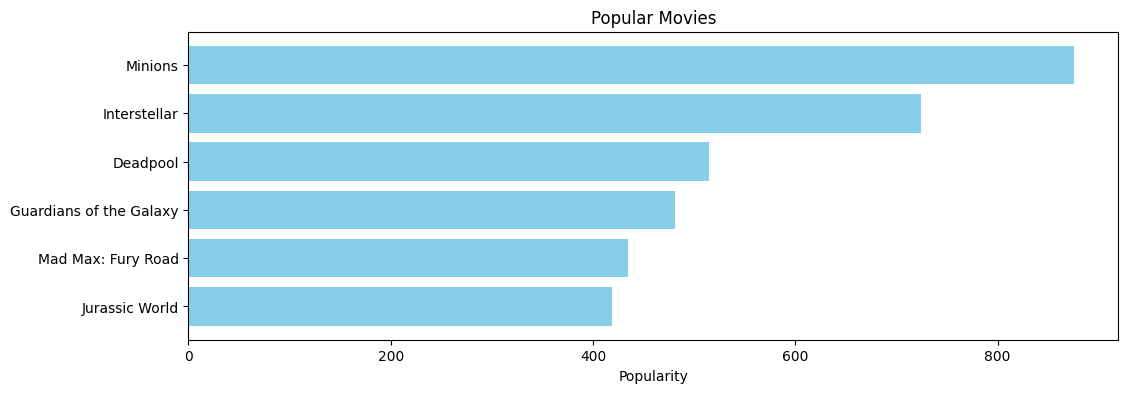

In [10]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


주의해야 할 점 :
* 모든 사용자에게 추천 영화의 일반 차트를 제공한다는 것
* 특정 사용자의 관심사와 취향에 민감하지 않다.

# **Content Based Filtering**
영화의 내용(개요, 출연진, 제작진, 키워드, 태그라인 등)을 이용하여 다른 영화와 유사성을 찾고, 그 다음에 유사성이 가장 높은 영화를 추천한다.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

플롯 설명을 기반으로 모든 영화에 대해 pairwise 유사도 점수를 계산하고 해당 유사도 점수를 기반으로 영화 추천

In [11]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

각 개요에 대해 TF-IDF 계산

TF :
   **(단어 개수/총 개수)**.

IDF :
**log(문서 수/단어 있는 문서 수)**

각 단어가 나타나는 문서에 대한 전체적인 중요도 :  **TF * IDF**

열이 단어, 행이 영화를 나타내는 행렬

자주 나오는 단어의 중요도를 줄여 최종 유사도 점수를 계산할 때의 중요성을 나타낸다.


In [12]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

유사도 점수 계산 euclidean, Pearson, cosine 등

코사인 유사도 사용

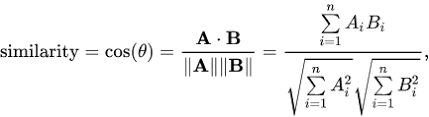

TfidfVectorizer를 사용하였기에 점곱을 계산하면 코사인 유사도 점수를 직접 얻을 수 있다

In [13]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화제목과 dataframe index의 reverse mapping

In [65]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

추천 시스템 정의

In [73]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies - 처음은 자기 자신이므로 제외
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [76]:
get_recommendations('Mission: Impossible - Rogue Nation')

153           Mission: Impossible - Ghost Protocol
139                        Mission: Impossible III
213                         Mission: Impossible II
511                                          X-Men
3672                        Navy Seals vs. Zombies
369     Lara Croft Tomb Raider: The Cradle of Life
179                         Penguins of Madagascar
2136                    Team America: World Police
2819                                  Act of Valor
3336                          Diamonds Are Forever
Name: title, dtype: object

In [17]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

## **Credits, Genres and Keywords Based Recommender**

추천의 질을 높이기 위해 감독, 장르 및 키워드 이용

 "stringified" 목록의 형태로 존재하므로  사용 가능한 구조로 변환

In [18]:
# Parse the stringified features into their corresponding python objects => '[]' -> []
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

감독 추출

In [19]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

각 feature당 3개씩 추출 (없으면 전체)

In [20]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [21]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


"Johnny Depp" 와 "Johnny Galecki"을 다르게 하기위해 strip진행

In [23]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

metadata soup만들기

In [25]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)



TF-IDF 대신 CountVectorizer 사용

더 많은 영화에서 활동한 것을 축소시키고 싶지 않음

In [26]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [27]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [28]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [29]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [30]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object


더 좋은 추천을 해주었다.

제작사를 추가해도 좋음

가중치를 늘리고 싶으면 feature를 여러번 soup에 더하면 된다.

한계:
* 특정영화에 가까운 영화만 추천
* 취향 반영 X, 다른 장르 추천 X
* 개인적이지 않음

# **Collaborative Filtering**

 **User based filtering**-  
유사한 사용자가 좋아한 제품 추천

유사성 측정 : pearson correlation 또는 cosine similarity
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)
문제점:
* 사용자의 선호도 변화



---
 **Item Based Collaborative Filtering**
 사용자가 평가한 아이템과의 유사도를 기준으로 아이템을 추천

 유사성 측정 : pearson correlation 또는 cosine similarity

빈칸을 수직으로 채움
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)


문제점:
* 확장성: 복잡성의 증가
* 희소성 : 등급을 매긴 사용자가 적어 서로 다른 영화간 유사도 증가


### **Single Value Decomposition**

확장성 및 희소성 해결 -> 잠재요인 모델

사용자에 대해 각 영화의 등급을 얼마나 더 잘 예측하는가 -> RMSE

RMSE가 작을 수록 성능 향상

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

In [39]:
!pip install scikit-surprise

In [47]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('./ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [68]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data

In [54]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8943  0.8986  0.8994  0.8916  0.8944  0.8957  0.0029  
MAE (testset)     0.6892  0.6916  0.6912  0.6872  0.6889  0.6896  0.0016  
Fit time          4.78    2.62    3.39    3.51    1.76    3.21    1.00    
Test time         0.69    0.32    0.59    0.23    0.13    0.39    0.21    


{'test_rmse': array([0.89428338, 0.89859092, 0.89944527, 0.89159562, 0.89436305]),
 'test_mae': array([0.68924385, 0.69158016, 0.69123529, 0.68720259, 0.68886614]),
 'fit_time': (4.777958869934082,
  2.619048595428467,
  3.3905835151672363,
  3.5108559131622314,
  1.7647051811218262),
 'test_time': (0.6937882900238037,
  0.31960058212280273,
  0.5939321517944336,
  0.23187828063964844,
  0.13128256797790527)}

RMSE = 0.89정도

In [51]:
trainset = data.build_full_trainset()
svd.fit(trainset)

user id가 1인 경우

In [52]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [61]:
svd.predict(1, 302, 3, verbose = True) #r_ui가 실제, est가 추정값, 예측가능

user: 1          item: 302        r_ui = 3.00   est = 2.82   {'was_impossible': False}


Prediction(uid=1, iid=302, r_ui=3, est=2.816099645973408, details={'was_impossible': False})

id가 302인 영화 2.82

중요한 점은 영화가 무엇인지 신경쓰지 않는다는 것

## **Conclusion**

demographic은 별로 효과적이지 못함

hybrid system : content-based과 collaborative filtering의 장점을 합친 것

In [ ]:
# **The Age of Recommender Systems**

**추천시스템**
* 검색 결과의 품질 향상
* 검색항목과 관련성, 검색이력에 현실화된 항목 제공
* 정보 필터링 시스템


1. 아마존 - 상품 제안
2. 유튜브 - 다음 재생 비디오 제안
3. 페이스북 - 좋아요와 팔로우할 사람 추천
4. 넷플릭스 - 사업의 성공을 위한 추천 엔진의 효과에 의존

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

추천 시스템의 세 가지 유형:

> *  **Demographic Filtering**- 영화의 인기도 및/또는 장르에 따라 모든 사용자에게 일반화된 추천을 제공. 시스템은 유사한 특징을 가진 사용자에게 동일한 영화를 추천

> 기본 아이디어 : 더 인기가 있고 비평가들의 호평을 받은 영화가 일반 관객들의 호감을 얻을 확률이 더 높다는 것

> *  **Content Based Filtering**- 특정 항목을 기준으로 유사한 항목을 추천하며, 이 시스템은 영화의 장르, 감독, 묘사, 배우 등의 항목 메타데이터를 이용하여 이러한 추천

> 기본 아이디어 : 어떤 사람이 특정 항목을 좋아하면 그와 유사한 항목도 좋아할 것

> *  **Collaborative Filtering**- 관심사가 비슷한 사람을 매칭하여 이 매칭을 기반으로 추천.

## data load

import pandas as pd
import numpy as np
df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

first dataset feature:-

* movie_id - 영화 ID.
* cast - 주연 및 조연 배우 이름
* crew - 감독, 작가, 편집자 등 이름

second dataset features:-

* budget - 영화 예산
* genre - 영화 장르
* homepage - 영화 홈페이지
* id - movie_id
* keywords - 영화와 관련된 키워드, 태그
* original_language - 영화가 만들어진 언어
* original_title - 번역, 각색 전 영화 제목
* overview - 간결한 영화 설명
* popularity - 영화 인기 숫자
* production_companies - 영화 제작소
* production_countries - 생산국가
* release_date - 출시날짜
* revenue - 영화 수익
* runtime - 영상 길이
* status - "Released" 또는 "Rumored".
* tagline - 영화의 tagline.
* title - 영화제목
* vote_average -  영화의 평균 평점
* vote_count - 평가받은 개수


df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Just a peak at our data.

df2.head(5)

# **Demographic Filtering** -
* 영화를 점수나 등급을 매길 수 있는 척도 필요
* 모든 영화의 점수를 계산
* 점수를 정렬하여 최고 등급의 영화를 사용자에게 추천

영화의 평균 평점을 점수로 사용할 수 있지만, 평균 평점 8.9에 3표밖에 없는 영화는 평균 평점 7.8에 40표를 받은 영화보다 낫다고 볼 수 없으므로, IMDB의 wr사용

![](https://image.ibb.co/jYWZp9/wr.png)

* v : 영화의 투표수
* m : 차트에 기재하는데 필요한 최소 득표수
* R : 영화의 평균 평점
* C : 전체 평균 평점


전체 영화의 평균 평점은 10점 만점에 약 6점

C= df2['vote_average'].mean()
C

90번째 백분위수를 컷오프로 사용, 영화가 차트에 나오려면 목록에 있는 영화의 90% 이상의 득표수가 있어야 한다.

m= df2['vote_count'].quantile(0.9)
m

최소 득표수 이상의 영화만 추출 : 481개의 영화

q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

wr 계산

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

정렬 및 출력

#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


주의해야 할 점 :
* 모든 사용자에게 추천 영화의 일반 차트를 제공한다는 것
* 특정 사용자의 관심사와 취향에 민감하지 않다.

# **Content Based Filtering**
영화의 내용(개요, 출연진, 제작진, 키워드, 태그라인 등)을 이용하여 다른 영화와 유사성을 찾고, 그 다음에 유사성이 가장 높은 영화를 추천한다.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

플롯 설명을 기반으로 모든 영화에 대해 pairwise 유사도 점수를 계산하고 해당 유사도 점수를 기반으로 영화 추천

df2['overview'].head(5)

각 개요에 대해 TF-IDF 계산

TF :
   **(단어 개수/총 개수)**.

IDF :
**log(문서 수/단어 있는 문서 수)**

각 단어가 나타나는 문서에 대한 전체적인 중요도 :  **TF * IDF**

열이 단어, 행이 영화를 나타내는 행렬

자주 나오는 단어의 중요도를 줄여 최종 유사도 점수를 계산할 때의 중요성을 나타낸다.


#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

유사도 점수 계산 euclidean, Pearson, cosine 등

코사인 유사도 사용

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAa0AAAB1CAMAAADKkk7zAAAAh1BMVEX///8AAAD5+fnFxcWtra3z8/P8/Pzw8PBycnL09PTo6Oj39/e9vb3g4ODBwcGXl5ednZ3Pz8/c3NyIiIiOjo5FRUXS0tJ+fn64uLimpqZPT0/d3d1tbW1jY2NXV1c9PT02NjZ3d3cvLy9TU1NdXV0YGBggICBISEg5OTkqKioLCwsTExMdHR2pbwthAAARwklEQVR4nO1d2YKiOhBNARJAIIGETVkVtbX7/7/vJiCILTPdLr3ckfPQ4xoYDlU5VamUCE2YMGHChAkTng2+YS1Z8tNnMeFzyMhBm716P30aEz4DnGQ1UjbxT5/HhM8BYmSBqf/0aUz4DDDMEQusyRX+L5CskF5HxPrp85jwGcRiyvIi/6dPY8KECRN+BKZ1DvzTJzThL/DyrGIsapFmteG8+wA+f0GZmeZMQPm+U5zQA2/BCI9wSfoC7Pz9GVmbg6d6SAWShGr+/FvPc0IDF2CgBdX1y/nb3ls+NC7FS2EfUR4FhT3F0j8ABuVgsnJ29vBNzGARnn1c3XPpBeNNNgn+n8AaqpOZ6PYwFa+7xSJQzz6tQfMBe7WYMh8/AecNtD+9VSXG6izZa5KtfG7yzZT5+BloZ1PXAHON42h7tu7l1zsXW0uaTWT9FAxYjMZZoeHM+IHKh/pRArr7BUlouqJy8tKVSWl8P3AAbOS6Y5IgJQEuH/taK+Q1qGJN04zME1/w4snAfgDeAS6vu26XNI6jNgLzeGN9x2kLxQdDfMEm72PpCd+BVXbpCp2UUEIjiMRj5ZiS8uu6EfT2Pg+RaZkXX5rw9bDT5cVrcyppQiFUwifGSRt1qRsmGZoTiDBWkynk+gGo+eVlN+M2LA4hnSMvSknzahtt4aTcqchO6j8p/wlfhzAfBLp64/IUjwcrTRdGxSEgqqVltrAoj2aQCo3Bc8NThPBI3Z865ecFzgfxr642TxQ10RJNQVj81aiKNAMraK6SNqer2Y0moZE/Kfhvhl7RwTO/HrMXp+L+hfyzKs17Vk2oO+NLRthp8WXrhHywRqK4xsuYufhpGl8c30mrp4234nR0ytZplhpGmmVplKhfsQRID5rqNoiThAdSAV5i5tmXVjR/4uB4B/uxu1pXkxyaqZ1B8AWV6j7sF7sW5dsGDiv14+9MUN8AwvG3GDSJVSeA8vGX0rGHcG11WhL+BDIAMEbfUY5szSp44997UhPGYW3TA8Bs7K2erQy2UzT6K0DAWQCMzkuCrTfu+CF9W9Ev0IVsuLKvhyp5/CH+OQQB0l5hNfaWYOsQpFm9h+wPE9tdSIcL9grl+y84xj8GF8QdvhrqDMw6ryfY2rDQ8+JildrjX78H1jAs0J1k9I6ZMEQGVIsLodT7V1TYHh918xayAbJHR1whfVc/GE9sfQRr9VoUhbCtk87AaZe869myAILLhY37UKkgAmSaJIlMAOpIn9j6EOTg+b7v7ABOc3zvoXq2fIDdg5MHikdeRMzVAT0HW8ogLzO7XrgF6+Yf7QBvI2lS3ip3R4Rko2mhuwAi4O4qq8NfwJbuf3k2C/NWEihujJFDriuLxKnQ7oWJkPEiXGERnCcTdL7YAOzz9bqA8vEKXjhCguIjpIaxv4MtnbPLF+cxWyJvV4yFEBZJHvZfn1GjKVBw0rRiWLev22SoLIUXlAtFS797dHaifo8vKIPQDiREsw5IITnwr19inMPm0oc4iw0VlL1GI1+I9ztpAvEjQphw0dBjZQZWdxqa07Fyr98JUzt3BNYXLs2coEfR5RUyNXmX++UYWw5v3Ap7wI2Eq0Z4m3QXIj/gsszh/7MCPv+RG2s+ljtuCkz9lzG20FxqrvGV0ivhrJpZy38Txwn3wiM7xpR9/QM0TjwPhZ46Q47n+cjVhKgINalvLPn8yJZDiI2b11TLTxzF9zyMMDtQz5Gfk39Dz/9r8BkTu7klQkob/6knPPGWSIkDKWNm5E2Q5slaST3JnnaZ7u8Ispi+ErTYlo7O9mW0plVAI0a2DGGyLZIjW95LGkdBLATBvlznK2Yb2zy0og2sXhhOiv2eYb46/O0iWy+LJFoJLx/tE20nhrSCSGNljHCUy/eXgdyWZjd1yHYwremNwQVZBhKJuQMcZHpQWIoDpaZbmQgkFRXokS0bIrQ0ah/p2iGNs8rCUeEhhUNsmiJaqgthLbWGWyfu5kGPstN3Jei6IbigYCm6syGIFIKxNEFWncn3Q9gEu2C/l17RLbskn704DZV/RVK2ga4Vp8NUv7ckM4ZFgrEvF1gdmZtJ5U7anfgTyesfNmwVgi3sCbOhhbjl7QNtJjki2BKXvjUCBsKZGl1aRzFnJ+jdgZiULQoCudVTWZSYQxZjyxI2JlcRdRuYYnpBU0eplt3ahzIYqW+jNPPUx6DnZfQw1qMOcyfck1oXAf6brOE+siWJ2a/P2WrmLb8qV2+B0BTxa3slectWqzLUIprx+G+zVtXsSNMRhoW8OtnGwzsRtTLlyJaZbJtpq1E0akn/MhRSA3gMRuVTj2T/oMPci0EGxqv2UPdssRG2hG3pMWS+SWRdQ7x5x5YjlXy1CaveUeHBTekqHVttlhVDINmqNyrS3fT1wJC1lgIeS1udNdYr6Fh1tmUN7jGvS9nqyoPQq2/LPR2m32z/sMPci/40E8lbejiy5YyyJeItf7HwRNRa8Bjbb+/Y4mpzH+aslxheZPRIj95GPW5jQiCX65Ria3ExNl7UIiiW85ai7Xxhxm1G5TRvqdVpqK/ro6Tb6ekwv3SXjrSFRKgMxMVUwg/W0bbMfS4T14UU73Lt3CmZYEvMJ05WVAS7m/ZKkiBs5i2dy2h+lsEH2b1SHokwMYGp7W0RiZtCMSoRBjSa0Cs9ROs2N2QXkyZ8ByZrhCgsqgyW6BVgQyLhI4tY/qFbgEMqn0eq+LNQbShTI90AI+JpaSN1If61kZ/DSmt8HQ8+uvNXUGVCBopDrnNhaPMKcmNRWDI6kHezla2yqPV1SlL/zvv7B1GBuNstjNTPXRlHxcgP3+dZdC9s3TzXPiykw3YrGvVQmqFuzRW1cZ5Oo9pF/NC5UisdSTG/gytmS3W0xskSduk2NqrJ1cGRT+hOiHA4+uVfDHjQOCp3UHV7MIRZev6Cuv7YEVaejrLTfcbd/j6KxWhZM0AgQsZS3lHuEV77oZlG0ZLf1K7C0a6DfZniteLrhkja/+WyuOV8R8BAJfcsHS2LMy+K+SfShNEZW+4r9OGDLRx82rAlA/xCytATUnmaki3nNrbqK8V3cHkU7VoB36q610flBvx0m96T2NPt3ZDr2PgE85E6ZEtcRK0zroatJgyUbDVtl/QSmkVKcaGk/ryDrd39hdPaTSWofvrxZ74JijYoiv5cx9MztiwRx64644ov2cIrKHD7Oalk72Arv3vxyqJfUCb323HGFhMStm8Hc8bWvJQPera2IGOD2+etsLpbm4Tky9KdvxdnbJXR+gBZl5FMh7ZVygeSLUvXFRUO0ohvZ4vSuz2hS56wPeiQLQ18ddvXEjaa8MK2Nqlh5PAayat9O1uGd/dScfzXFOg/iiFbeTlHAcDxMoyztY0Yi4rXppHq7Ww9oB5Re3K2nC3FOn+FfaszztjqPWEgLQ/vYHXXvNU339JnM3OGb6jTxrSThLppiiGeY3PegC12EF4ue+32LPxh3pLXWdGaUvmb2fLTjq04K6JqfAfSB0OQLvL30jytSv4Us9iAraLmhJP60MRSR03YqOSerdklWzcpeI13FYmVB0tk1NcPofZ9CW1eaygZaTn0D6JjS9G1Q3PdwzcALJeC7J6thWBLls4qltSEiqIsM9jwO9iK+s7FilxB2NwwBfUiQxdMhYg9l23ZSQDE11GoCVdoUP89W6W0KLKBLUkSksNeNpq7ma1B++mCIgz4+tBpIDIImy2z2Pq/ZZdvQcdWtMjznaagZJ3n+Vr2WLiwLXMtPpMvBPIqvitPuD5JQrCQ9ur9vVRgBErSz3W40lBcM+0ZivHOs7pDuEO25mObCMwb2cKnJoSOmLLUNL26sN4hfbnsknjIY8ZTZDbOs7pDXHjCC9xqWza722t5/PfWv30h/mxbH7N1q21x7YoAaz66e8EmV5ijbv0rXpIJti5+4aWBGskNpvJRjZGyG/mEGSfCJV3vgtqeADN8jvFcFLYJHelnF8vdVfr83RDjN4HiUa7+G71cXXHbXbYlk3DEzND2/xOmoI8tJim+15azXomF/IpJidxmnCSUCIhI78JG5R7aGUlD9nJxQ+ha0/oz5schmjEIH2835C487bRsN+E6zGrJFt7BtrnWhDEWGWVTzTrEUpZmW4sKOZuLNXCLyDoRK4It0/ohAsj7EHnmqW0xpodRtDJREEw//XQb1KixZXUPg9IcN33Xr2heHTTpbGPkby82lYa87bWbAzmZUxjt+zoUh+1ldZmRAcNqoqBgPbF1G0jSXmF6GP4Qhrk4tyBPmF7zYJ6sLzyhe0xduMV24OJwNFjzYk0JupJBItv7r+LJE96GtFvciiAbTP7Ls9ZtuF4fGvp01bis3IqP1qYkr/WAcZ+e9JIBzWMGhoks4ws6Kj4J+kwGXp9l34fKVNdSrdkMoYfURxexVZ93ElMXG2ik08KJuS6bw2TCxDC10f3Ln88Jpe5VpLr9U+dKZ+24Ms2vhwZRtfcqw+oXt1BYv47KPbWMTFm2WEQmZpGr1tO8dRO86mQMFNaj0YPCKQrllp0ZeVns6vfVTf5A7tvleiw+J6+VFsfZns6RvVvsCjLZ1k1IyEn8KSmwsZvez3VkSU0/l52R1feMqvwU5JkExqL7FDillO2oiUIxxEjz5AmfQaUObnOngJGyQCWt7TiBsfxJg3joGq0KLiuo8Hp1nLYmMXgXzn5bFREY6T3hFlFVGW0NyBi0swAsLulFXsletYXKEUT/Rs7pm+Ed3ZmeD1NVijGybmzlnuVY4eZFpiaw1itC6yhJMB1KyRnhl8kvDu1+YCEJxb+xOhnYVbC6zZ3+Wak/H5m25u1ui/mL7DMhvtiJCEyPJuXzQQSma2xk8SSFZfPeprk3qmRi6yrQbs+nNqygSNILSTijDCJLSHfyBoaYdPS+1Yu3P25H89jAmbrsQhLOYloCT5KE7atmp5z/FEUbj4NVwzHfFA1aFsTZoFJJaWMoXFWRYENXIwGqO3ZnR5h1v4ds85OpeGzg5WbttkNMxVdlopc2P5mB1SkBfx1o9la1HnCQKVLrYWxM2jo1xRIQV3cm/8WY0uz4fhisjhtzB5LQZ8N+FVrk9EMchxFI7O0zVNg8DpjTYNFe6pPICPNhAlAbk/JCY/Bj+hDHLGsbIZmnCpolG278dYtkbIHL1l4mXXgNTMepN41ROX0Pq2XNl85y6cv9y37C3mDUXS2D47LK3PFZ29fX4R2vFos8McTSRLrlxzzYjFcd5HzyhFcibZdH4ug445sZyGK4fF1FRr4GgGzsW7q9sLqATNHa5sxeJwIxgbKWY6SRUa+3YojRjIW1da4pBJmAZJzayAGeHL2SorquLbecN78JJDBaxGTSIO4NRm1/8thlR383D9tN63Y/xCgp6opOCY0rQYDKuT67rkRK95PTWocHhuTJvrJHJk7iad66Etq+CYvza9Ors5NZhKXsDDe/eufWbPKD18ILCtmv7NQo03HP3dPHPyfoZC9xV0HTwHpXcPXJBjMTPoRZS5nhRv31pWdJp5huP/SRmMkugSHrozSXD/cBeWT3hNv8vwiNKCT09AspZ3ZhWfBh4xw9lg3k1FNdtmkN4yvsLSY18ShEMi3eV9Ag7f1q7sdsCVEom932zas8er7FDmcTW48COXCM6u76JuEqRDZpweV881GrPyRFYYr1fnHL03iCQnocQtwGgq2vOvmnQ7yqLbOPXzVrYwlneIR0aJ+wLb9YhJh0FTRhHCXCGR5hoomtByLcrSyv6iYrhb6vnv0EW066ipes/1ycnpvj5AkfB6UGJzkV0xZugmLegn3SE2J+SMJeVeqEeH7YDRFOtvVQpOBEdmdQ1ptKFPO0lcf34OO9RUIUErUXGU4VxY5yGsKKC+ZNWYsHQYjC9SkZSM534Wtxwj/efSxE4SnvpNv8jF9V0zif4uMHgW5YcLqYyrkVzBVl/vGaofe2YKcKGuX8h4UUMYQ5TVwPgv2yz+/cUuovDvXUhvtb4CzOdhjcAquCu7qjTvg8Mvjrj358AjMKH7fhnvAQGHB32wQXph+A+yaw7d2KTd1P++a+Ccm9IkOIwkf8ZOOEz8C/P3a1LnYHTfjH8R9wYiZCyjFLIwAAAABJRU5ErkJggg==)

TfidfVectorizer를 사용하였기에 점곱을 계산하면 코사인 유사도 점수를 직접 얻을 수 있다

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화제목과 dataframe index의 reverse mapping

#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

추천 시스템 정의

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies - 처음은 자기 자신이므로 제외
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

get_recommendations('Mission: Impossible - Rogue Nation')

get_recommendations('The Avengers')

## **Credits, Genres and Keywords Based Recommender**

추천의 질을 높이기 위해 감독, 장르 및 키워드 이용

 "stringified" 목록의 형태로 존재하므로  사용 가능한 구조로 변환

# Parse the stringified features into their corresponding python objects => '[]' -> []
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

감독 추출

# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

각 feature당 3개씩 추출 (없으면 전체)

# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

"Johnny Depp" 와 "Johnny Galecki"을 다르게 하기위해 strip진행

# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

metadata soup만들기

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)



TF-IDF 대신 CountVectorizer 사용

더 많은 영화에서 활동한 것을 축소시키고 싶지 않음

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

get_recommendations('The Dark Knight Rises', cosine_sim2)

get_recommendations('The Godfather', cosine_sim2)


더 좋은 추천을 해주었다.

제작사를 추가해도 좋음

가중치를 늘리고 싶으면 feature를 여러번 soup에 더하면 된다.

한계:
* 특정영화에 가까운 영화만 추천
* 취향 반영 X, 다른 장르 추천 X
* 개인적이지 않음

# **Collaborative Filtering**

 **User based filtering**-  
유사한 사용자가 좋아한 제품 추천

유사성 측정 : pearson correlation 또는 cosine similarity
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)
문제점:
* 사용자의 선호도 변화



---
 **Item Based Collaborative Filtering**
 사용자가 평가한 아이템과의 유사도를 기준으로 아이템을 추천

 유사성 측정 : pearson correlation 또는 cosine similarity

빈칸을 수직으로 채움
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)


문제점:
* 확장성: 복잡성의 증가
* 희소성 : 등급을 매긴 사용자가 적어 서로 다른 영화간 유사도 증가


### **Single Value Decomposition**

확장성 및 희소성 해결 -> 잠재요인 모델

사용자에 대해 각 영화의 등급을 얼마나 더 잘 예측하는가 -> RMSE

RMSE가 작을 수록 성능 향상

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

!pip install scikit-surprise

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('./ratings_small.csv')
ratings.head()

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=5,verbose=True)

RMSE = 0.89정도

trainset = data.build_full_trainset()
svd.fit(trainset)

user id가 1인 경우

ratings[ratings['userId'] == 1]

svd.predict(1, 302, 3, verbose = True) #r_ui가 실제, est가 추정값, 예측가능

id가 302인 영화 2.82

중요한 점은 영화가 무엇인지 신경쓰지 않는다는 것

## **Conclusion**

demographic은 별로 효과적이지 못함

hybrid system : content-based과 collaborative filtering의 장점을 합친 것